In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
df = pd.read_excel('Online Retail.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [5]:
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [6]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [7]:
df[df.InvoiceNo.str.contains('C', na=False)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [8]:
df = df[~df['InvoiceNo'].str.contains('C')]

In [9]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


<Axes: >

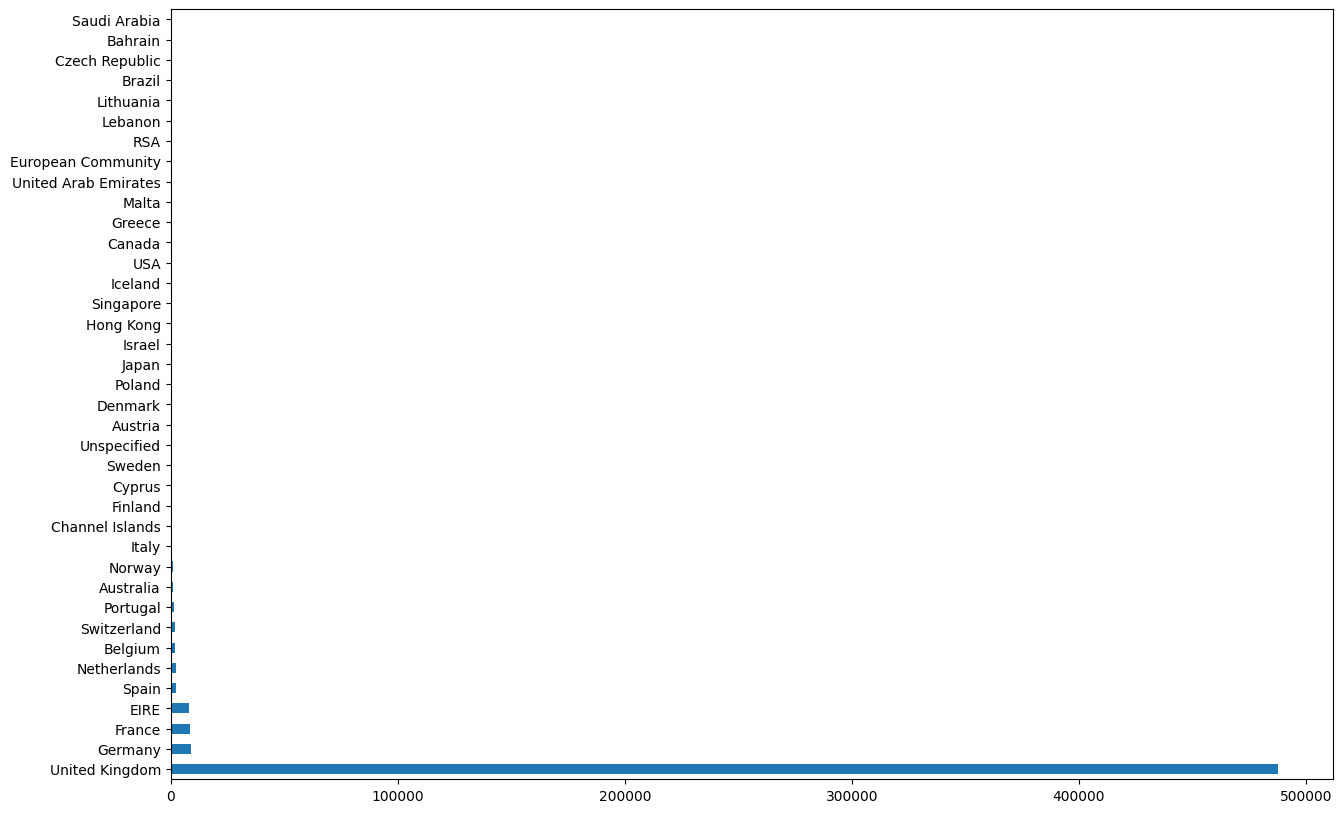

In [10]:
df['Country'].value_counts().plot(kind='barh', figsize=(15,10))

In [11]:
basket = df[df['Country'] == "United Kingdom"].groupby(['InvoiceNo','Description'])['Quantity']

In [12]:
basket = basket.sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

In [13]:
basket.head(10)

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
def encode_data(datapoint):
    if datapoint <= 0:
        return 0
    if datapoint >= 1:
        return 1

In [15]:
basket = basket.applymap(encode_data)

In [16]:
basket.drop('POSTAGE', inplace=True, axis=1)

In [17]:
itemsets = apriori(basket.astype('bool'), min_support=0.03, use_colnames=True)

In [18]:
itemsets.head(10)

,support,itemsets
0,0.045803,(6 RIBBONS RUSTIC CHARM)
1,0.031124,(60 CAKE CASES VINTAGE CHRISTMAS)
2,0.040339,(60 TEATIME FAIRY CAKE CASES)
3,0.046928,(ALARM CLOCK BAKELIKE GREEN)
4,0.035142,(ALARM CLOCK BAKELIKE PINK)
5,0.049821,(ALARM CLOCK BAKELIKE RED)
6,0.036214,(ANTIQUE SILVER T-LIGHT GLASS)
7,0.073445,(ASSORTED COLOUR BIRD ORNAMENT)
8,0.042267,(BAKING SET 9 PIECE RETROSPOT)
9,0.035089,(BATHROOM METAL SIGN)


In [19]:
rules = association_rules(itemsets, metric="confidence", min_threshold=0.5)

In [20]:
rules["antecedents"] = rules["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules["consequents"] = rules["consequents"].apply(lambda x: list(x)[0]).astype("unicode")

In [21]:
for i in range(len(rules)):
    print(rules.loc[i, 'antecedents'],' ==> ', rules.loc[i, 'consequents'],
         '[', rules.loc[i, 'support'], ', ', rules.loc[i, 'confidence'], ']')

ALARM CLOCK BAKELIKE RED  ==>  ALARM CLOCK BAKELIKE GREEN [ 0.030160175711148016 ,  0.6053763440860216 ]
ALARM CLOCK BAKELIKE GREEN  ==>  ALARM CLOCK BAKELIKE RED [ 0.030160175711148016 ,  0.6426940639269406 ]
GREEN REGENCY TEACUP AND SAUCER  ==>  PINK REGENCY TEACUP AND SAUCER [ 0.030910162318530027 ,  0.6177730192719486 ]
PINK REGENCY TEACUP AND SAUCER  ==>  GREEN REGENCY TEACUP AND SAUCER [ 0.030910162318530027 ,  0.8207681365576103 ]
GREEN REGENCY TEACUP AND SAUCER  ==>  ROSES REGENCY TEACUP AND SAUCER [ 0.03755290084105641 ,  0.7505353319057816 ]
ROSES REGENCY TEACUP AND SAUCER  ==>  GREEN REGENCY TEACUP AND SAUCER [ 0.03755290084105641 ,  0.7324973876698014 ]
JUMBO  BAG BAROQUE BLACK WHITE  ==>  JUMBO BAG RED RETROSPOT [ 0.03053516901483902 ,  0.6263736263736264 ]
JUMBO BAG PINK POLKADOT  ==>  JUMBO BAG RED RETROSPOT [ 0.042052820485348474 ,  0.6773080241587576 ]
JUMBO SHOPPER VINTAGE RED PAISLEY  ==>  JUMBO BAG RED RETROSPOT [ 0.03519580007499866 ,  0.5798764342453663 ]
JUMBO ST

In [22]:
support = rules['support'].values
confidence = rules['confidence'].values

In [24]:
from mlxtend.frequent_patterns import fpgrowth

itemsets = fpgrowth(basket.astype('bool'), min_support=0.03, use_colnames=True)

<Axes: title={'center': 'Association Rules'}, xlabel='support', ylabel='confidence'>

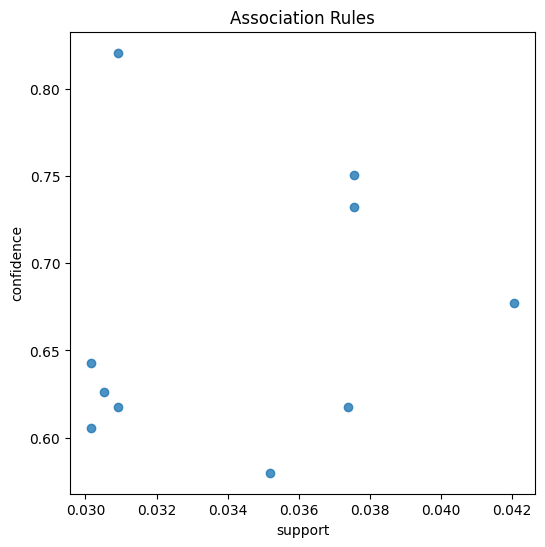

In [23]:
plt.figure(figsize=(6,6))
plt.title('Association Rules')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x=support, y=confidence, fit_reg=False)

In [25]:
itemsets.head(10)

,support,itemsets
0,0.116034,(WHITE HANGING HEART T-LIGHT HOLDER)
1,0.073445,(ASSORTED COLOUR BIRD ORNAMENT)
2,0.040071,(HOME BUILDING BLOCK WORD)
3,0.032517,(LOVE BUILDING BLOCK WORD)
4,0.030107,(DOORMAT NEW ENGLAND)
5,0.053517,(JAM MAKING SET WITH JARS)
6,0.060267,(PAPER CHAIN KIT 50'S CHRISTMAS)
7,0.057642,(WOODEN PICTURE FRAME WHITE FINISH)
8,0.050463,(WOODEN FRAME ANTIQUE WHITE)
9,0.037714,(RED HANGING HEART T-LIGHT HOLDER)


In [26]:
rules = association_rules(itemsets, metric="confidence", min_threshold=0.5)

In [27]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         10 non-null     object 
 1   consequents         10 non-null     object 
 2   antecedent support  10 non-null     float64
 3   consequent support  10 non-null     float64
 4   support             10 non-null     float64
 5   confidence          10 non-null     float64
 6   lift                10 non-null     float64
 7   leverage            10 non-null     float64
 8   conviction          10 non-null     float64
 9   zhangs_metric       10 non-null     float64
dtypes: float64(8), object(2)
memory usage: 932.0+ bytes


In [28]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.062088,0.103820,0.042053,0.677308,6.523895,0.035607,2.777201,0.902769
1,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.060535,0.103820,0.037392,0.617699,5.949737,0.031108,2.344176,0.885531
2,(JUMBO BAG BAROQUE BLACK WHITE),(JUMBO BAG RED RETROSPOT),0.048749,0.103820,0.030535,0.626374,6.033290,0.025474,2.398601,0.877006
3,(JUMBO SHOPPER VINTAGE RED PAISLEY),(JUMBO BAG RED RETROSPOT),0.060695,0.103820,0.035196,0.579876,5.585425,0.028894,2.133135,0.874011
4,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.049821,0.046928,0.030160,0.605376,12.900183,0.027822,2.415142,0.970850
5,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.046928,0.049821,0.030160,0.642694,12.900183,0.027822,2.659288,0.967903
6,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.050035,0.051267,0.037553,0.750535,14.639752,0.034988,3.803076,0.980765
7,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.051267,0.050035,0.037553,0.732497,14.639752,0.034988,3.551237,0.982039
8,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.050035,0.037660,0.030910,0.617773,16.403939,0.029026,2.517719,0.988498
9,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.037660,0.050035,0.030910,0.820768,16.403939,0.029026,5.300203,0.975787


In [29]:
rules["antecedents"] = rules["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules["consequents"] = rules["consequents"].apply(lambda x: list(x)[0]).astype("unicode")

In [30]:
for i in range(len(rules)):
    print(rules.loc[i, 'antecedents'],' ==> ', rules.loc[i, 'consequents'],
         '[', rules.loc[i, 'support'], ', ', rules.loc[i, 'confidence'], ']')

JUMBO BAG PINK POLKADOT  ==>  JUMBO BAG RED RETROSPOT [ 0.042052820485348474 ,  0.6773080241587576 ]
JUMBO STORAGE BAG SUKI  ==>  JUMBO BAG RED RETROSPOT [ 0.037392189425188835 ,  0.6176991150442478 ]
JUMBO  BAG BAROQUE BLACK WHITE  ==>  JUMBO BAG RED RETROSPOT [ 0.03053516901483902 ,  0.6263736263736264 ]
JUMBO SHOPPER VINTAGE RED PAISLEY  ==>  JUMBO BAG RED RETROSPOT [ 0.03519580007499866 ,  0.5798764342453663 ]
ALARM CLOCK BAKELIKE RED  ==>  ALARM CLOCK BAKELIKE GREEN [ 0.030160175711148016 ,  0.6053763440860216 ]
ALARM CLOCK BAKELIKE GREEN  ==>  ALARM CLOCK BAKELIKE RED [ 0.030160175711148016 ,  0.6426940639269406 ]
GREEN REGENCY TEACUP AND SAUCER  ==>  ROSES REGENCY TEACUP AND SAUCER [ 0.03755290084105641 ,  0.7505353319057816 ]
ROSES REGENCY TEACUP AND SAUCER  ==>  GREEN REGENCY TEACUP AND SAUCER [ 0.03755290084105641 ,  0.7324973876698014 ]
GREEN REGENCY TEACUP AND SAUCER  ==>  PINK REGENCY TEACUP AND SAUCER [ 0.030910162318530027 ,  0.6177730192719486 ]
PINK REGENCY TEACUP AND 

In [31]:
support = rules['support'].values
confidence = rules['confidence'].values

<Axes: title={'center': 'Association Rules'}, xlabel='support', ylabel='confidence'>

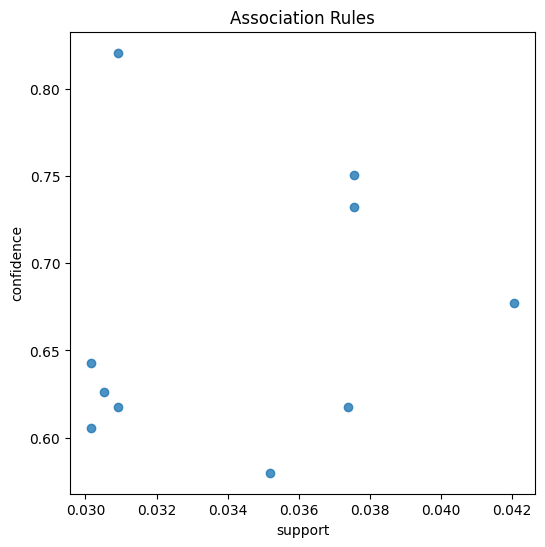

In [32]:
plt.figure(figsize=(6,6))
plt.title('Association Rules')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x=support, y=confidence, fit_reg=False)